<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/DistribuicaoEstatistica/Gr%C3%A1fico_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Notebook, nosso objetivo é entender como aplicar o Gráfico P.

### 1 - Quais situações são recomendadas a sua utilização;
#### Quando se quer acompanhar a proporção de unidades defeituosas, ou seja, a taxa de rejeição de lotes (ex: % de peças rejeitadas, % de clientes insatisfeitos).
### 2 - Com quais tipos de variáveis devemos trabalhar nesse tipo de gráfico;
#### Variável discreta binária (defeituoso ou não; sucesso/fracasso).
### 3 - Como construir o gráfico;
#### - Para cada amostra, calcule a proporção de itens defeituosos (p = nº defeituosos / total inspecionado).
#### - Linha central = proporção média global.
#### - LSC e LIC variam com o tamanho da amostra.
### 4 - Como explicar o gráfico;
#### Mostra o percentual de falhas em um processo ao longo do tempo. Ideal para avaliar a estabilidade da qualidade sob uma ótica percentual.

#### 📌 "O gráfico P não conta quantos furos existem, ele te diz a chance de um item furar. Ele fala em probabilidade prática: qual a chance de dar ruim hoje?"

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/DistribuicaoEstatistica/base_dados/Green_Belt_FM2S_Demo_4.xlsx?raw=True'
dados = pd.read_excel(url)
dados.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [3]:
# Aqui o Pandas "prepara" o arquivo para ver as abas
excel_file = pd.ExcelFile(url)
nomes_das_abas = excel_file.sheet_names
print(nomes_das_abas)

['GC - Var. Contínuas', 'GC - Var. Contagem', 'GC - Var. Categóricas']


In [4]:
# Lendo a primeira aba da planilha
dados_aba3 = pd.read_excel(url, sheet_name=nomes_das_abas[2]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='GC - Var. Categóricas')
dados_aba3.head()

,Dia,Ausências,Ausências não justificadas,Total de funcionários
0,1,10,2,90
1,2,8,3,90
2,3,14,1,90
3,4,6,1,90
4,5,8,1,90


In [5]:
# 1. Calcular a proporção 'p' para cada dia
dados_aba3['p'] = dados_aba3['Ausências não justificadas'] / dados_aba3['Total de funcionários']

# 2. Calcular a proporção média 'p_barra'
p_barra = dados_aba3['Ausências não justificadas'].sum() / dados_aba3['Total de funcionários'].sum()

# 3. Calcular o desvio padrão da proporção para os limites de controle
# A fórmula para o desvio padrão para um gráfico P é sqrt(p_barra * (1 - p_barra) / n)
# Onde 'n' é o tamanho da amostra (Total de funcionários).
# Assumimos que 'n' é constante para simplificar ou usamos a média de 'n'.
# Se 'n' varia muito, a abordagem fica um pouco mais complexa, mas para o básico vamos usar a média.
n_medio = dados_aba3['Total de funcionários'].mean() # ou você pode usar o 'Total de funcionários' de cada linha se ele varia
std_dev_p = (p_barra * (1 - p_barra) / n_medio)**0.5 # Desvio padrão para os limites de controle

# 4. Calcular os Limites de Controle Superior (LCS) e Inferior (LCI)
# LCS = p_barra + 3 * std_dev_p
# LCI = p_barra - 3 * std_dev_p (garantindo que não seja menor que 0)
LCS = p_barra + 3 * std_dev_p
LCI = max(0, p_barra - 3 * std_dev_p)

print(f"Proporção média (p_barra): {p_barra:.4f}")
print(f"LCS: {LCS:.4f}")
print(f"LCI: {LCI:.4f}")

# 5. Criar o gráfico P usando Plotly Express
fig = px.line(dados_aba3, x='Dia', y='p', title='Gráfico P - Proporção de Ausências Não Justificadas')

# Adicionar a linha central (p_barra)
fig.add_hline(y=p_barra, line_dash="dot", annotation_text="Linha Central (p̄)", annotation_position="top right")

# Adicionar os Limites de Controle
fig.add_hline(y=LCS, line_dash="dash", line_color="red", annotation_text="LCS", annotation_position="top right")
fig.add_hline(y=LCI, line_dash="dash", line_color="red", annotation_text="LCI", annotation_position="top right")

# Mostrar o gráfico
fig.show()

Proporção média (p_barra): 0.0200
LCS: 0.0643
LCI: 0.0000


Proporção média (p_barra): 0.0200
LCS: 0.0643
LCI: 0.0000


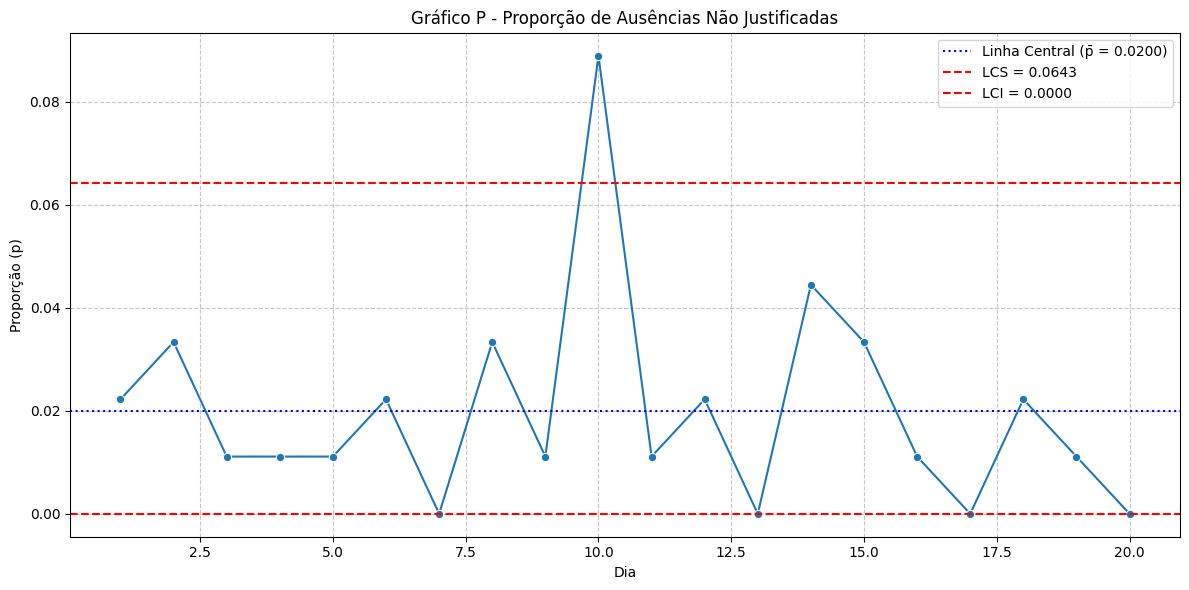

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Apenas para simular seu dataframe, se já estiver carregado, não precisa

# 1. Calcular a proporção 'p' para cada dia
dados_aba3['p'] = dados_aba3['Ausências não justificadas'] / dados_aba3['Total de funcionários']

# 2. Calcular a proporção média 'p_barra'
p_barra = dados_aba3['Ausências não justificadas'].sum() / dados_aba3['Total de funcionários'].sum()

# 3. Calcular o desvio padrão da proporção para os limites de controle
n_medio = dados_aba3['Total de funcionários'].mean()
std_dev_p = (p_barra * (1 - p_barra) / n_medio)**0.5

# 4. Calcular os Limites de Controle Superior (LCS) e Inferior (LCI)
LCS = p_barra + 3 * std_dev_p
LCI = max(0, p_barra - 3 * std_dev_p)

print(f"Proporção média (p_barra): {p_barra:.4f}")
print(f"LCS: {LCS:.4f}")
print(f"LCI: {LCI:.4f}")

# 5. Criar o gráfico P usando Matplotlib/Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dia', y='p', data=dados_aba3, marker='o')

# Adicionar a linha central (p_barra)
plt.axhline(y=p_barra, color='blue', linestyle=':', label=f'Linha Central (p̄ = {p_barra:.4f})')

# Adicionar os Limites de Controle
plt.axhline(y=LCS, color='red', linestyle='--', label=f'LCS = {LCS:.4f}')
plt.axhline(y=LCI, color='red', linestyle='--', label=f'LCI = {LCI:.4f}')

plt.title('Gráfico P - Proporção de Ausências Não Justificadas')
plt.xlabel('Dia')
plt.ylabel('Proporção (p)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()